서울시 물가정보 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프를 노트북 안에  그리기 위해 설정

%matplotlib inline

# 한글폰트 깨짐 방지

from matplotlib import font_manager, rc

font_path = '../visualization/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 마이너스 부호 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

데이터수집

In [5]:
data = pd.read_csv('../../data_add/생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding = 'cp949')
data

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42694,1636118,226,롯데마트 구로점,171,달걀(10개),10개(600g),2990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21
42695,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
42696,1636114,226,롯데마트 구로점,312,애호박,1개 (300g),2790,2021-01,"국내산,청원",2,대형마트,530000,구로구,2021-01-21
42697,1636113,226,롯데마트 구로점,22,오이,1개 (200g),1190,2021-01,"국내산,백오이",2,대형마트,530000,구로구,2021-01-21


In [6]:
data.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [8]:
data.isna().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

In [9]:
# 자료형 확인(데이터타입 확인)
data.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

데이터 확인

In [11]:
# 컬럼별 데이터 확인

data['시장/마트 번호']

0          2
1        228
2          1
3         25
4          6
        ... 
42694    226
42695    226
42696    226
42697    226
42698    226
Name: 시장/마트 번호, Length: 42699, dtype: int64

In [12]:
data['시장/마트 번호'].nunique()
# nunique : number of unique
# 102개 시장/마트 존재 확인

102

In [16]:
# 시장/마트 목록

data['시장/마트 이름'].nunique()

102

In [17]:
data.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [19]:
# 시장/마트 목록
# 중복데이터 여부 확인 : 겹치는게 있는 지 확인
# drop_duplicates() > 중복 제거

data[['시장/마트 번호', '시장/마트 이름', '자치구 이름', '시장유형 구분(시장/마트) 이름']]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트
...,...,...,...,...
42694,226,롯데마트 구로점,구로구,대형마트
42695,226,롯데마트 구로점,구로구,대형마트
42696,226,롯데마트 구로점,구로구,대형마트
42697,226,롯데마트 구로점,구로구,대형마트


In [21]:
df_market = data[['시장/마트 번호', '시장/마트 이름', '자치구 이름', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [23]:

df_market['자치구 이름'].value_counts()

중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: 자치구 이름, dtype: int64

In [24]:
# 자치구 이름으로 시장/마트 확인

condition = df_market['자치구 이름'] == '강동구'
df_market[condition]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
1573,151,암사종합시장,강동구,전통시장
1921,205,둔촌역전통시장,강동구,전통시장
4555,153,이마트 명일점,강동구,대형마트
4799,154,홈플러스 강동점,강동구,대형마트


In [25]:
condition = df_market['자치구 이름'] == '송파구'
df_market[condition]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
209,145,마천중앙시장,송파구,전통시장
1223,147,롯데백화점 잠실점,송파구,대형마트
1289,148,홈플러스 잠실점,송파구,대형마트
3808,146,방이시장,송파구,전통시장


In [27]:
# 품목 목록

data.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [28]:
data.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [29]:
data[['품목 번호', '품목 이름']]

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
...,...,...
42694,171,달걀(10개)
42695,27,배
42696,312,애호박
42697,22,오이


In [31]:
df_item = data[['품목 번호', '품목 이름']].drop_duplicates()

In [33]:
df_item.sort_values('품목 이름')

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
...,...,...
1397,261,"조기(생물,수입산)"
5348,135,"조기(중국산,생물)"
649,277,호박
18,119,호박(인큐베이터)


In [34]:
df_item = df_item.sort_values('품목 이름')

In [36]:
# 품목 이름 확인(30개씩 확인)

df_item[:30]

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
4834,269,"고등어(냉동,수입산)"
2,266,"고등어(생물,국산)"
1341,267,"고등어(생물,수입산)"
3984,314,"냉동참조기(20cm,국산)"
3706,313,"냉동참조기(20cm,수입)"


In [37]:
df_item[30:60]

,품목 번호,품목 이름
2457,265,"명태(생물,수입산)"
1019,184,"명태(일본산,냉동)"
79,25,무
103,308,무(1kg)
0,133,무(세척무)
33,282,무(세척무)
2432,274,"무(세척무, 중)"
157,27,배
56,276,배(신고)
4268,248,"배(신고),중급(대)"


In [38]:
df_item[60:]

,품목 번호,품목 이름
10,309,양파(1.5kg망)
2191,272,양파(작은망)
5,22,오이
21,311,오이(다다기)
31,253,오징어
2620,54,오징어(냉동)
441,256,"오징어(냉동,국산)"
6813,257,"오징어(냉동,수입산)"
36,254,"오징어(생물,국산)"
2567,255,"오징어(생물,수입산)"


자치구 목록

In [39]:
data.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24


In [40]:
data[['자치구 코드', '자치구 이름']]

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구
...,...,...
42694,530000,구로구
42695,530000,구로구
42696,530000,구로구
42697,530000,구로구


In [41]:
data[['자치구 코드', '자치구 이름']].drop_duplicates()

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구
7,380000,은평구
9,620000,관악구
13,410000,서대문구
15,530000,구로구
17,560000,영등포구


In [42]:
df_gu = data[['자치구 코드', '자치구 이름']].drop_duplicates()

In [43]:
df_gu.shape

(25, 2)

In [44]:
df_gu.head()

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구


시장유형

In [46]:
data[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']]

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장
2,1,전통시장
3,1,전통시장
4,2,대형마트
...,...,...
42694,2,대형마트
42695,2,대형마트
42696,2,대형마트
42697,2,대형마트


In [47]:
data[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


In [49]:
df_gubun = data[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [50]:
df_gubun.head()

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


삼겹살 가격 분석

In [51]:
data.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [61]:
condition = (data['품목 이름'].str.contains('삼겹살')) & (data['년도-월'] == '2021-06')
data[condition]

# str.contains() >> 문자열 중에 찾고자 하는 문자 포함된 여부를 확인해줌

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
34,1667081,10,용문시장,99,돼지고기(생삼겹살),100g,2600,2021-06,대전한돈,1,전통시장,170000,용산구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,1673495,10,용문시장,99,돼지고기(생삼겹살),100g,2750,2021-06,대전 한돈,1,전통시장,170000,용산구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6720,1670803,10,용문시장,99,돼지고기(생삼겹살),100g,2750,2021-06,대전 한돈,1,전통시장,170000,용산구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [65]:
condition = \
    (data['품목 이름'].str.contains('삼겹살')) \
        & (data['년도-월'] == '2021-06') \
        & (data['실판매규격'].str.contains('600g'))

df_sam = data[condition]

In [66]:
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [68]:
# 삼겹살 600g 평균가격
df_sam['가격(원)'].mean()

16842.723214285714

In [69]:
# 삼겹살 600g의 최고 가격
df_sam['가격(원)'].max()

35890

In [70]:
# 삼겹살 600g의 최저 가격
df_sam['가격(원)'].min()

1690

In [71]:
# 가장 비싼곳 확인
df_sam[df_sam['가격(원)'] == df_sam['가격(원)'].max()]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4043,1668108,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,국내산,2,대형마트,710000,송파구,2021-06-24
4064,1674531,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24


In [72]:
# 가장 싼곳 확인
df_sam[df_sam['가격(원)'] == df_sam['가격(원)'].min()]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


우리 동네 삼겹살 가격

In [80]:
gu = input('당신이 사는 구 이름은?')

df_sam[df_sam['자치구 이름'] == gu]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3711,1669531,145,마천중앙시장,99,돼지고기(생삼겹살),600g,15000,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3719,1671856,145,마천중앙시장,99,돼지고기(생삼겹살),600g,15000,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3744,1668074,145,마천중앙시장,99,돼지고기(생삼겹살),600g,12800,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3749,1674497,145,마천중앙시장,99,돼지고기(생삼겹살),600g,12800,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3811,1668091,146,방이시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3855,1669514,146,방이시장,99,돼지고기(생삼겹살),600g,17000,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3861,1674514,146,방이시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3877,1671873,146,방이시장,99,돼지고기(생삼겹살),600g,17000,2021-06,국내산,1,전통시장,710000,송파구,2021-06-24
3956,1671890,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,29880,2021-06,국내산,2,대형마트,710000,송파구,2021-06-24
3977,1669548,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,29880,2021-06,국내산,2,대형마트,710000,송파구,2021-06-24


In [81]:
df_sam[df_sam['자치구 이름'] == gu][['시장/마트 이름', '품목 이름','실판매규격','가격(원)']]

,시장/마트 이름,품목 이름,실판매규격,가격(원)
3711,마천중앙시장,돼지고기(생삼겹살),600g,15000
3719,마천중앙시장,돼지고기(생삼겹살),600g,15000
3744,마천중앙시장,돼지고기(생삼겹살),600g,12800
3749,마천중앙시장,돼지고기(생삼겹살),600g,12800
3811,방이시장,돼지고기(생삼겹살),600g,12000
3855,방이시장,돼지고기(생삼겹살),600g,17000
3861,방이시장,돼지고기(생삼겹살),600g,12000
3877,방이시장,돼지고기(생삼겹살),600g,17000
3956,롯데백화점 잠실점,돼지고기(생삼겹살),600g,29880
3977,롯데백화점 잠실점,돼지고기(생삼겹살),600g,29880


In [82]:
df_sam_gu = df_sam[df_sam['자치구 이름'] == gu][['시장/마트 이름', '품목 이름','실판매규격','가격(원)']]

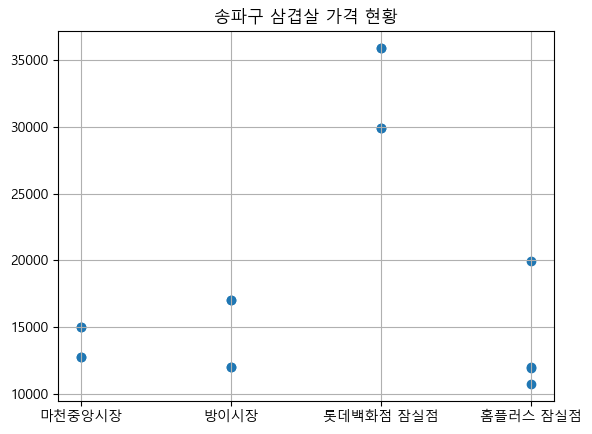

In [84]:
# 시각화

x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']

plt.scatter(x,y)
plt.title(gu + ' 삼겹살 가격 현황')
plt.grid()

plt.show()

마트 지점별 삼겹살 가격

In [85]:
mart = input('시장/마트 이름 : ')

In [86]:
# 마트 지점별 삼겹살 가격

df_sam[df_sam['시장/마트 이름'].str.contains(mart)]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
325,1673529,75,이마트 성수점,202,돼지고기(생삼겹살),600g,15480,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24
459,1668665,80,이마트 자양점,99,돼지고기(생삼겹살),600g,14880,2021-06,국내산.도드람,2,대형마트,215000,광진구,2021-06-24
745,1670956,80,이마트 자양점,99,돼지고기(생삼겹살),600g,22080,2021-06,국내산.제주,2,대형마트,215000,광진구,2021-06-24
1021,1671398,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14100,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
3436,1669038,74,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14880,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24
3461,1673546,74,이마트 왕십리점,202,돼지고기(생삼겹살),600g,15480,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24
3477,1670854,74,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14100,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24


In [87]:
e_mart = df_sam[df_sam['시장/마트 이름'].str.contains(mart)]
e_mart.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
325,1673529,75,이마트 성수점,202,돼지고기(생삼겹살),600g,15480,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24
459,1668665,80,이마트 자양점,99,돼지고기(생삼겹살),600g,14880,2021-06,국내산.도드람,2,대형마트,215000,광진구,2021-06-24


In [88]:
e_mart[['시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)']]

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원)
76,이마트 가양점,99,돼지고기(생삼겹살),600g,15480
86,이마트 가양점,99,돼지고기(생삼겹살),600g,14880
146,이마트 가양점,99,돼지고기(생삼겹살),600g,14880
325,이마트 성수점,202,돼지고기(생삼겹살),600g,15480
459,이마트 자양점,99,돼지고기(생삼겹살),600g,14880
745,이마트 자양점,99,돼지고기(생삼겹살),600g,22080
1021,이마트 가양점,99,돼지고기(생삼겹살),600g,14100
3436,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14880
3461,이마트 왕십리점,202,돼지고기(생삼겹살),600g,15480
3477,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14100


In [90]:
e_mart[['시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)']].shape

(28, 5)

In [91]:
df_sam_mart = e_mart[['시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)']]

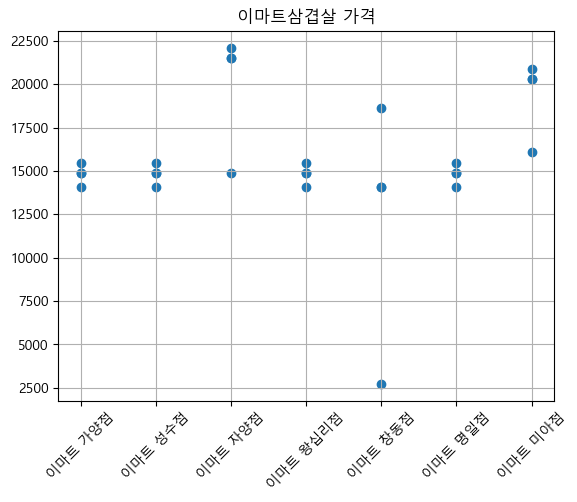

In [92]:
x = df_sam_mart['시장/마트 이름']
y = df_sam_mart['가격(원)']

plt.scatter(x, y)
plt.grid()
plt.title(mart + '삼겹살 가격')
plt.xticks(rotation = 45)
plt.show()

달걀 가격 분석

In [93]:
data.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [94]:
data.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [139]:
egg = data[(data['품목 이름'].str.contains('달걀')) & (data['년도-월'] == '2021-06')]
egg.head()


,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
11,1671112,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
26,1668433,16,현대백화점 미아점,171,달걀(10개),10개,6000,2021-06,하람드림특란,2,대형마트,290000,성북구,2021-06-24
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24


In [140]:
egg['가격(원)'].describe()

count      799.000000
mean      6708.916145
std       3922.920012
min          0.000000
25%       4000.000000
50%       6900.000000
75%       8700.000000
max      75000.000000
Name: 가격(원), dtype: float64

In [141]:
# 가격이 0원인게 있다 ??

egg[egg['가격(원)'] == 0]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
1139,1671027,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
3953,1671893,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
3982,1669551,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4049,1668111,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4057,1674534,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
5002,1669143,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5051,1673719,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5092,1667271,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
6705,1671995,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [142]:
egg_data = egg[['시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)','자치구 이름']]
egg_data.head()

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름
4,6,이마트 용산점,171,달걀(10개),15구,5980,용산구
11,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,도봉구
26,16,현대백화점 미아점,171,달걀(10개),10개,6000,성북구
28,16,현대백화점 미아점,320,달걀(30개),30개,0,성북구
43,82,롯데마트 강변점,320,달걀(30개),30개,10800,광진구


In [143]:
egg_data['품목 이름'].value_counts()

달걀(10개)    396
달걀(30개)    387
달걀          13
달걀(15개)      2
달걀(왕란)       1
Name: 품목 이름, dtype: int64

In [144]:
egg_30 = egg_data[egg_data['품목 이름'].str.contains('30개')]
egg_30.head()

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름
11,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,도봉구
28,16,현대백화점 미아점,320,달걀(30개),30개,0,성북구
43,82,롯데마트 강변점,320,달걀(30개),30개,10800,광진구
52,10,용문시장,320,달걀(30개),30개,10500,용산구
62,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구


In [145]:
egg_30['1개당 가격'] = round(egg_30['가격(원)']/30,0)
egg_30

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_3332\3845287226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_30['1개당 가격'] = round(egg_30['가격(원)']/30,0)


,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
11,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,도봉구,317.0
28,16,현대백화점 미아점,320,달걀(30개),30개,0,성북구,0.0
43,82,롯데마트 강변점,320,달걀(30개),30개,10800,광진구,360.0
52,10,용문시장,320,달걀(30개),30개,10500,용산구,350.0
62,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구,230.0
...,...,...,...,...,...,...,...,...
6749,102,목3동시장,320,달걀(30개),30구,10100,양천구,337.0
6756,102,목3동시장,320,달걀(30개),30개,9800,양천구,327.0
6771,102,목3동시장,320,달걀(30개),30개,9500,양천구,317.0
6779,16,현대백화점 미아점,320,달걀(30개),30개,0,성북구,0.0


In [146]:
egg_10 = egg_data[egg_data['품목 이름'].str.contains('10개')]
egg_10

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름
4,6,이마트 용산점,171,달걀(10개),15구,5980,용산구
26,16,현대백화점 미아점,171,달걀(10개),10개,6000,성북구
80,42,이마트 가양점,171,달걀(10개),10개(600g),4680,강서구
93,109,고척근린시장,171,달걀(10개),특란670g,3300,구로구
132,42,이마트 가양점,171,달걀(10개),10개(600g),4680,강서구
...,...,...,...,...,...,...,...
6701,10,용문시장,171,달걀(10개),10개,4400,용산구
6703,16,현대백화점 미아점,171,달걀(10개),10개 (600g),6000,성북구
6704,10,용문시장,171,달걀(10개),10개,4400,용산구
6723,16,현대백화점 미아점,171,달걀(10개),10개,5500,성북구


In [147]:
egg_10['1개당 가격'] = round(egg_10['가격(원)']/10,0)
egg_10

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_3332\754218026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_10['1개당 가격'] = round(egg_10['가격(원)']/10,0)


,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
4,6,이마트 용산점,171,달걀(10개),15구,5980,용산구,598.0
26,16,현대백화점 미아점,171,달걀(10개),10개,6000,성북구,600.0
80,42,이마트 가양점,171,달걀(10개),10개(600g),4680,강서구,468.0
93,109,고척근린시장,171,달걀(10개),특란670g,3300,구로구,330.0
132,42,이마트 가양점,171,달걀(10개),10개(600g),4680,강서구,468.0
...,...,...,...,...,...,...,...,...
6701,10,용문시장,171,달걀(10개),10개,4400,용산구,440.0
6703,16,현대백화점 미아점,171,달걀(10개),10개 (600g),6000,성북구,600.0
6704,10,용문시장,171,달걀(10개),10개,4400,용산구,440.0
6723,16,현대백화점 미아점,171,달걀(10개),10개,5500,성북구,550.0


In [148]:
egg_15 = egg_data[egg_data['품목 이름'].str.contains('15개')]
egg_15

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름
860,110,이마트 신도림점,321,달걀(15개),15개(900g),4680,구로구
6625,227,NC백화점 신구로점,321,달걀(15개),15개(1020g),5990,구로구


In [149]:
egg_15['1개당 가격'] = round(egg_15['가격(원)']/10,0)
egg_15

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_3332\3801170769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_15['1개당 가격'] = round(egg_15['가격(원)']/10,0)


,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
860,110,이마트 신도림점,321,달걀(15개),15개(900g),4680,구로구,468.0
6625,227,NC백화점 신구로점,321,달걀(15개),15개(1020g),5990,구로구,599.0


In [150]:
egg_king = egg_data[egg_data['품목 이름'].str.contains('왕란')]
egg_king

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름
5280,205,둔촌역전통시장,181,달걀(왕란),1마리(1.5kg),8000,강동구


In [151]:
egg_egg = egg_data[egg_data['품목 이름'] == '달걀']
egg_egg['실판매규격'].value_counts()

특란1750g         3
25개(1300g)      2
15개(특란) 900g    2
15개(900g)       2
특란600g          1
10개(600g)       1
특란690g          1
30개(1.8kg)      1
Name: 실판매규격, dtype: int64

In [152]:
egg_egg_30 = egg_egg[egg_egg['실판매규격'].str.contains('30개')]
egg_egg_10 = egg_egg[egg_egg['실판매규격'].str.contains('10개')]
egg_egg_25 = egg_egg[egg_egg['실판매규격'].str.contains('25개')]
egg_egg_15 = egg_egg[egg_egg['실판매규격'].str.contains('15개')]


In [153]:
egg_egg_30['1개당 가격'] = round(egg_egg_30['가격(원)']/30,0)

egg_egg_10['1개당 가격'] = round(egg_egg_10['가격(원)']/10,0)
egg_egg_25['1개당 가격'] = round(egg_egg_25['가격(원)']/25,0)
egg_egg_15['1개당 가격'] = round(egg_egg_15['가격(원)']/15,0)

egg_egg_30

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_3332\2550863600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_egg_30['1개당 가격'] = round(egg_egg_30['가격(원)']/30,0)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_3332\2550863600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_egg_10['1개당 가격'] = round(egg_egg_10['가격(원)']/10,0)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_3332\2550863600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
6670,227,NC백화점 신구로점,17,달걀,30개(1.8kg),8990,구로구,300.0


In [154]:
egg_one = pd.concat([egg_30, egg_10, egg_15,egg_egg_30, egg_egg_20,egg_egg_10, egg_egg_25, egg_egg_15], axis = 0)
egg_one

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
11,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,도봉구,317.0
28,16,현대백화점 미아점,320,달걀(30개),30개,0,성북구,0.0
43,82,롯데마트 강변점,320,달걀(30개),30개,10800,광진구,360.0
52,10,용문시장,320,달걀(30개),30개,10500,용산구,350.0
62,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구,230.0
...,...,...,...,...,...,...,...,...
906,110,이마트 신도림점,17,달걀,25개(1300g),7980,구로구,319.0
1237,33,현대백화점 신촌점,17,달걀,15개(특란) 900g,10500,서대문구,700.0
5543,33,현대백화점 신촌점,17,달걀,15개(900g),10500,서대문구,700.0
5553,33,현대백화점 신촌점,17,달걀,15개(900g),10500,서대문구,700.0


In [155]:
egg_zero = egg_one[egg_one['1개당 가격'] == 0].index
egg_one = egg_one.drop(egg_zero, axis = 0)
egg_one



,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
11,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,도봉구,317.0
43,82,롯데마트 강변점,320,달걀(30개),30개,10800,광진구,360.0
52,10,용문시장,320,달걀(30개),30개,10500,용산구,350.0
62,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구,230.0
75,82,롯데마트 강변점,320,달걀(30개),30개,10800,광진구,360.0
...,...,...,...,...,...,...,...,...
906,110,이마트 신도림점,17,달걀,25개(1300g),7980,구로구,319.0
1237,33,현대백화점 신촌점,17,달걀,15개(특란) 900g,10500,서대문구,700.0
5543,33,현대백화점 신촌점,17,달걀,15개(900g),10500,서대문구,700.0
5553,33,현대백화점 신촌점,17,달걀,15개(900g),10500,서대문구,700.0


In [156]:
egg_one.describe() # 계란 1개당 가격이 제일 싼 곳은 20원 제일 비싼 곳은 2500원 이다.

,시장/마트 번호,품목 번호,가격(원),1개당 가격
count,792.000000,792.000000,792.000000,792.000000
mean,101.970960,238.233586,6829.310606,380.373737
std,68.626938,81.397852,3848.098408,149.143782
min,1.000000,17.000000,2600.000000,184.000000
25%,42.000000,171.000000,4200.000000,300.000000
50%,92.000000,171.000000,6900.000000,350.000000
75%,145.250000,320.000000,8700.000000,430.000000
max,228.000000,321.000000,75000.000000,2500.000000


In [157]:
egg_one[egg_one['1개당 가격'] == egg_one['1개당 가격'].max()]

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
414,108,남구로시장,320,달걀(30개),30개(1.5kg),75000,구로구,2500.0


In [158]:
egg_one[egg_one['1개당 가격'] == egg_one['1개당 가격'].min()]

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
1477,75,이마트 성수점,320,달걀(30개),30개,5520,성동구,184.0


In [159]:
# 우리 구에서 계란 가격을 알아보자

gu = input('구를 입력해 주세요.')

egg_one_gu = egg_one[egg_one['자치구 이름'].str.contains(gu)]
egg_one_gu

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
3697,145,마천중앙시장,320,달걀(30개),30개,8500,송파구,283.0
3705,145,마천중앙시장,320,달걀(30개),30개,9000,송파구,300.0
3708,145,마천중앙시장,320,달걀(30개),30개,8500,송파구,283.0
3746,145,마천중앙시장,320,달걀(30개),30개,9000,송파구,300.0
3814,146,방이시장,320,달걀(30개),30개,8500,송파구,283.0
3832,146,방이시장,320,달걀(30개),30개,9000,송파구,300.0
3843,146,방이시장,320,달걀(30개),30개,9000,송파구,300.0
3858,146,방이시장,320,달걀(30개),30개,9500,송파구,317.0
4140,148,홈플러스 잠실점,320,달걀(30개),30개,13000,송파구,433.0
4152,148,홈플러스 잠실점,320,달걀(30개),30개,6900,송파구,230.0


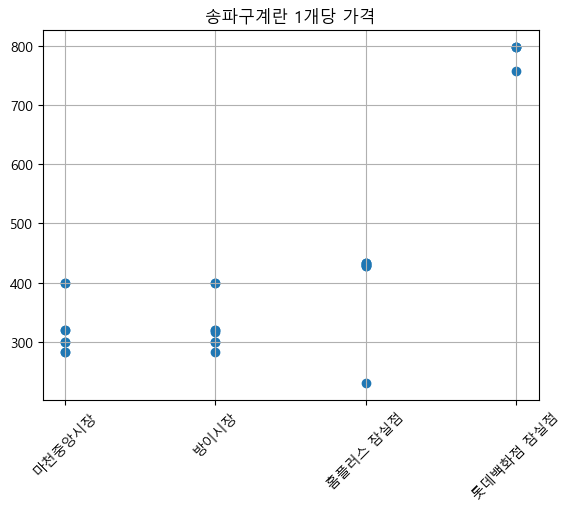

In [161]:
x = egg_one_gu['시장/마트 이름']
y = egg_one_gu['1개당 가격']

plt.scatter(x, y)
plt.grid()
plt.title(gu + '계란 1개당 가격')
plt.xticks(rotation = 45)
plt.show()

마트 지점별 달걀 가격

In [162]:
mart_branch = input('마트 이름 : ')

In [164]:
# 마트 지점별 달걀 가격
egg_one_mart = egg_one[egg_one['시장/마트 이름'].str.contains(mart_branch)]



In [165]:
egg_one_mart

,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),자치구 이름,1개당 가격
62,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구,230.0
82,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구,230.0
138,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구,230.0
152,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,강서구,230.0
436,44,이마트 역삼점,320,달걀(30개),30개,12360,강남구,412.0
...,...,...,...,...,...,...,...,...
6165,214,이마트 목동점,171,달걀(10개),10개,4680,양천구,468.0
6243,214,이마트 목동점,171,달걀(10개),10개,4680,양천구,468.0
860,110,이마트 신도림점,321,달걀(15개),15개(900g),4680,구로구,468.0
858,110,이마트 신도림점,17,달걀,25개(1300g),7980,구로구,319.0


In [167]:
egg_one_mart = egg_one_mart.drop_duplicates()

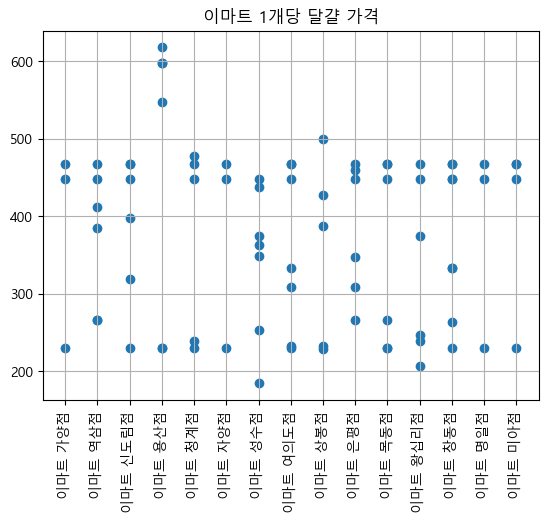

In [169]:
x = egg_one_mart['시장/마트 이름']
y = egg_one_mart['1개당 가격']

plt.scatter(x, y)
plt.title(mart_branch + ' 1개당 달걀 가격')
plt. xticks(rotation = 90)
plt.grid()